# Customer Churn Prediction Analysis 

In [711]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import joblib

import warnings 
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

## Loading the data

In [712]:
# Path to the dataset
df = pd.read_csv("customer_churn_data.csv")
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [713]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [714]:
df[df["Churn"] == "No"]

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
11,12,40,Female,19,36.18,One-Year,Fiber Optic,687.42,Yes,No
15,16,39,Female,41,89.11,Two-Year,Fiber Optic,3653.51,Yes,No
18,19,35,Male,98,49.59,Two-Year,Fiber Optic,4859.82,Yes,No
24,25,39,Male,47,79.36,One-Year,DSL,3729.92,Yes,No
...,...,...,...,...,...,...,...,...,...,...
946,947,29,Female,15,98.06,One-Year,Fiber Optic,1470.90,Yes,No
950,951,42,Male,13,52.58,One-Year,DSL,683.54,Yes,No
956,957,48,Female,18,60.54,One-Year,Fiber Optic,1089.72,Yes,No
963,964,52,Male,45,66.06,Two-Year,DSL,2972.70,Yes,No


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [716]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [717]:
df["InternetService"] = df["InternetService"].fillna("")

In [718]:
df.duplicated().sum()

0

In [719]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [720]:
numeric_columns_df = df.select_dtypes(include=["number"])
numeric_columns_df

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [721]:
numeric_columns_df.corr() # Correlations take -1 (strong negative) and 1 (strong positive)

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [722]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [723]:
type(df["Churn"].value_counts())

pandas.core.series.Series

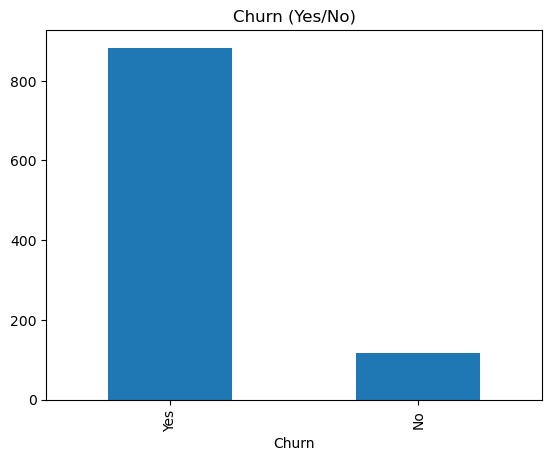

In [724]:
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [725]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [726]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [727]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [728]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [729]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [730]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

At the lower terms we can see that the monthly charge average decreases

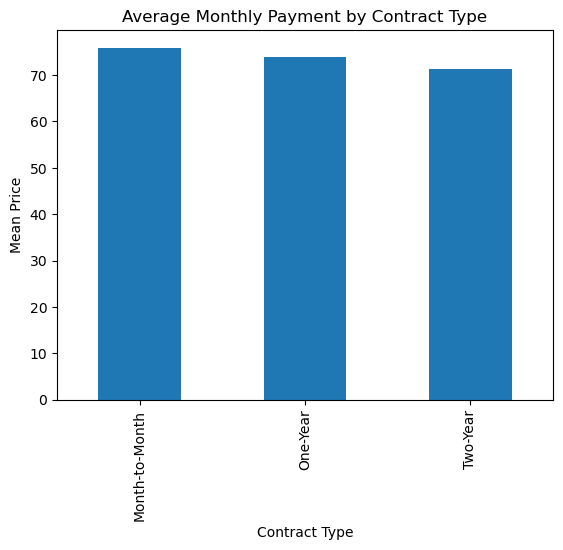

In [731]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.title("Average Monthly Payment by Contract Type")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.show()

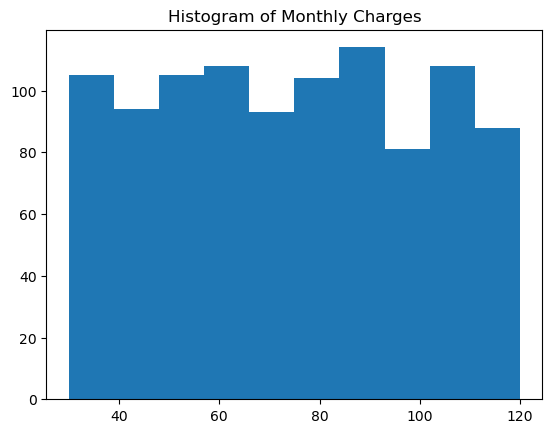

In [732]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

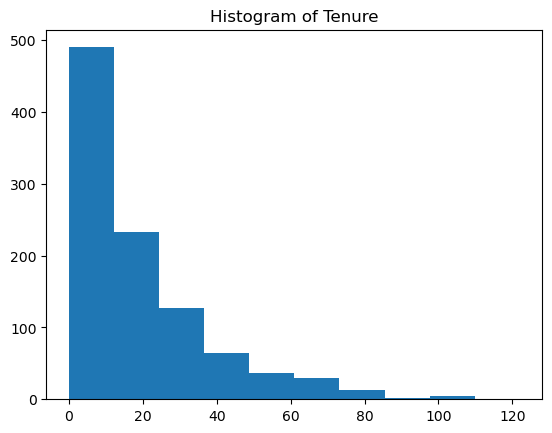

In [733]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show()

## Feature engineering

In [734]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [735]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


### Encode Features

In [736]:
#x   1 Female and 0 Male
x = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]
x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)

y = df[["Churn"]]
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [737]:
type(x["Gender"][0])

numpy.int64

In [738]:
type(y["Churn"][0])

numpy.int64

In [739]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


## Train Test Split

In [740]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Feature Scaling

In [741]:
scaler = StandardScaler()

In [742]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [743]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

### Model Evaluation Function

In [744]:
# Model Evaluation Function
def model_performance(name, model, x_test, y_test, metrics_score, model_score):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], '--r')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve: {name}")
        plt.legend()
        plt.show()

    # Saving the accuracy in the results dictionary for comparison 
    metrics_score[name] = acc
    model_score[name] = model

# Model Comparison Dictionary
results = {}
best_models = {}

### SMOTE, Synrhetic Minority Over-sampling Technique
Note: The data is highly imbalanced.
- 883 customers turned (churn = 1)
- 117 non-churned (churn = 0)

After running the models and reviewing the plot 'actual vs predicted', I decided to use SMOTE. The model is learning to just predict "Yes" every time, which actually gives the illusion of high accuracy, because: 
1. It fails to detect churned customers accurately 
2. Precision, recall, and F1-score for the minority class suffer 
3. The model becomes too biased.

SMOTE balances the dataset by generating new synthetic samples for the minority class. 
- It selects a minority class point (e.g. a churn=0 sample)
- Then finds its k nearest neighbours (by default k=5)
- And creates new, similar data points by interpolating between them
- This helps the model learn the decision boundary better

In [745]:
sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

### Logistic Regression

Logistic Regression Accuracy: 0.8600
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        28
           1       0.86      0.99      0.92       172

    accuracy                           0.86       200
   macro avg       0.68      0.51      0.50       200
weighted avg       0.81      0.86      0.80       200



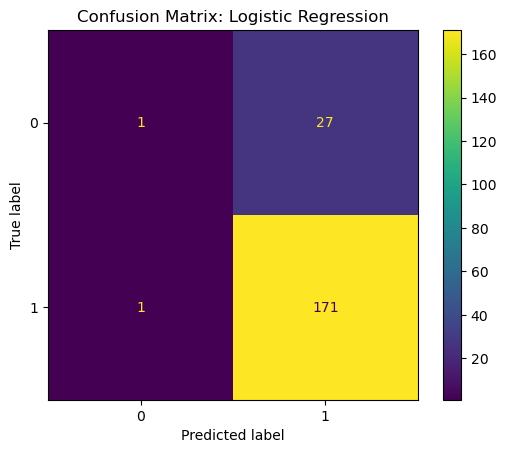

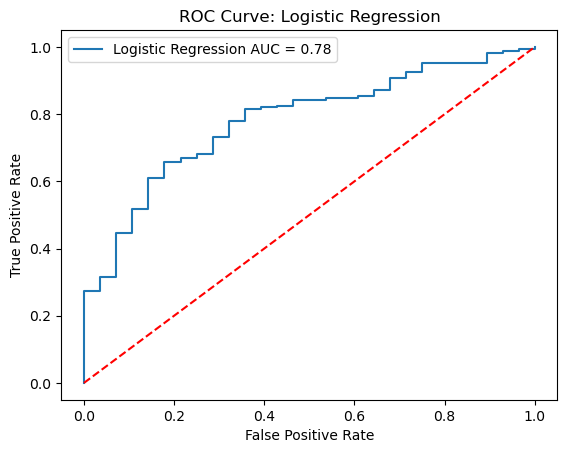

In [746]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
model_performance("Logistic Regression", log_reg, x_test, y_test, results, best_models)

### KNN

KNN Accuracy: 0.8550
              precision    recall  f1-score   support

           0       0.40      0.07      0.12        28
           1       0.87      0.98      0.92       172

    accuracy                           0.85       200
   macro avg       0.63      0.53      0.52       200
weighted avg       0.80      0.85      0.81       200



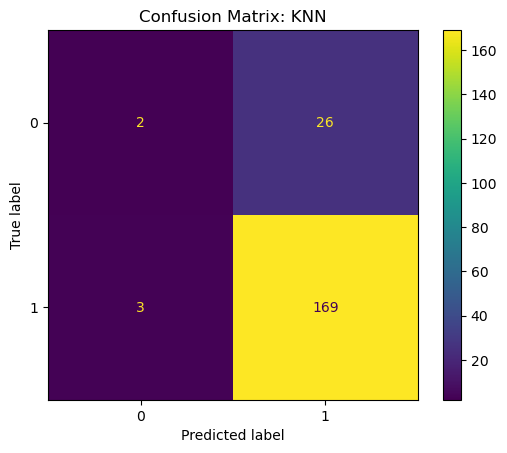

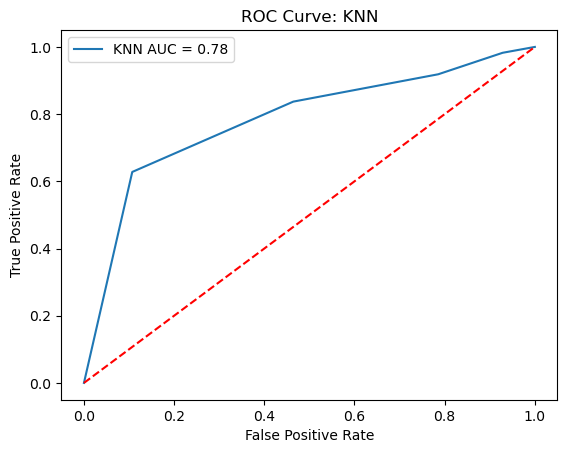

In [747]:
# KNN
param_knn = {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5)
grid_knn.fit(x_train, y_train)
model_performance("KNN", grid_knn.best_estimator_, x_test, y_test, results, best_models)

### SVM 

SVM Accuracy: 0.8600
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.86      1.00      0.92       172

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.74      0.86      0.80       200



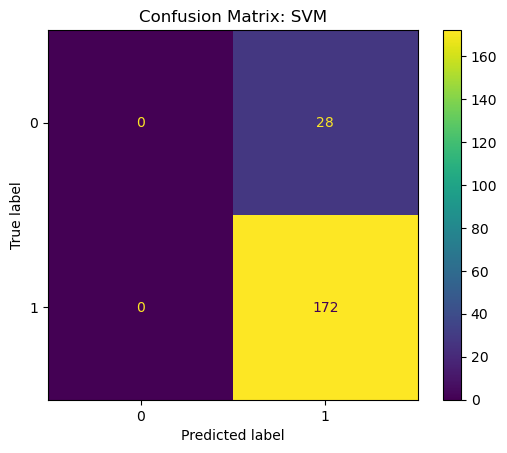

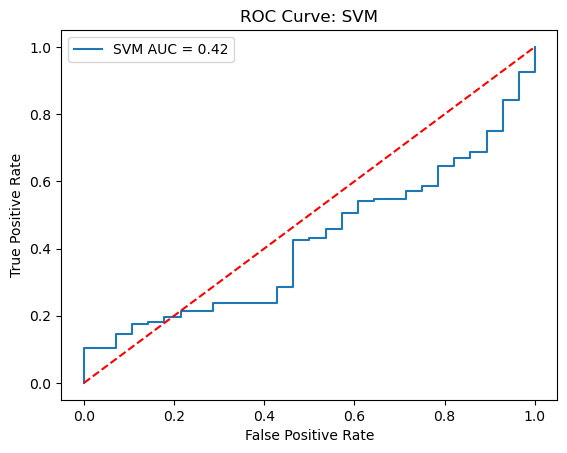

In [748]:
param_svc = {"C": [0.01, 0.1, 0.5, 1], "kernel":["linear", "rbf"]}
grid_svc = GridSearchCV(SVC(probability=True), param_svc, cv=5)
grid_svc.fit(x_train, y_train)
model_performance("SVM", grid_svc.best_estimator_, x_test, y_test, results, best_models)

### Decision Tree

Decision Tree Accuracy: 0.8150
              precision    recall  f1-score   support

           0       0.26      0.18      0.21        28
           1       0.87      0.92      0.90       172

    accuracy                           0.81       200
   macro avg       0.57      0.55      0.55       200
weighted avg       0.79      0.81      0.80       200



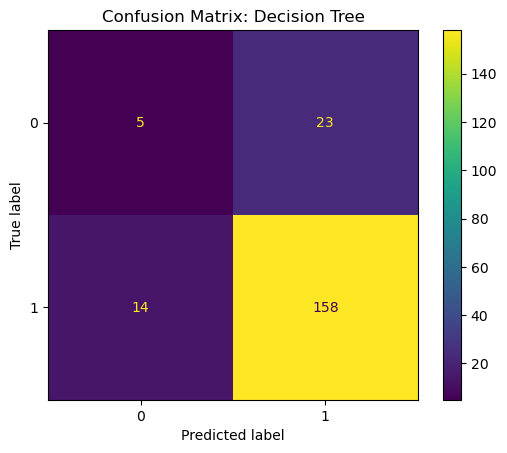

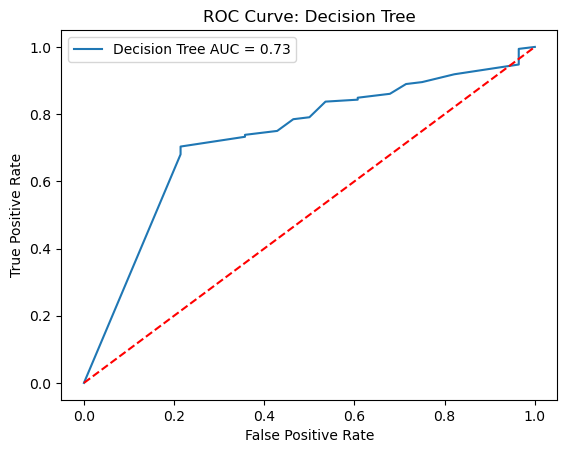

In [749]:
# Decision Tree
param_tree = {
    "criterion": ["gini", "entropy"], 
    "splitter": ["best", "random"], 
    "max_depth" : [None, 10, 20, 30], 
    "min_samples_split" : [2,5,10], 
    "min_samples_leaf": [1,2,4]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_tree, cv=5)
grid_tree.fit(x_train, y_train)
model_performance("Decision Tree", grid_tree.best_estimator_, x_test, y_test, results, best_models)

### Random Forest

Decision Tree Accuracy: 0.8150
              precision    recall  f1-score   support

           0       0.26      0.18      0.21        28
           1       0.87      0.92      0.90       172

    accuracy                           0.81       200
   macro avg       0.57      0.55      0.55       200
weighted avg       0.79      0.81      0.80       200



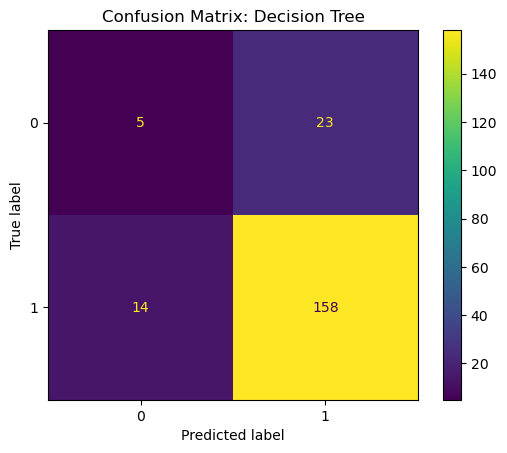

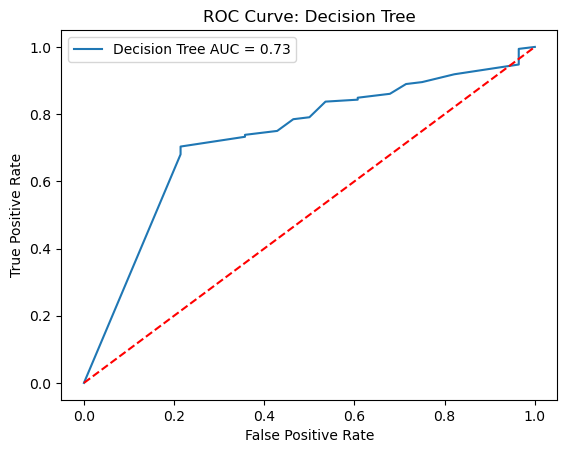

In [750]:
param_rfc = {
    "n_estimators" : [32, 64, 128, 256], 
    "max_features" : [2,3,4], 
    "bootstrap" : [True, False]}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_rfc, cv=5)
grid_rfc.fit(x_train, y_train)
model_performance("Decision Tree", grid_tree.best_estimator_, x_test, y_test, results, best_models)

XGBoost Accuracy: 0.8250
              precision    recall  f1-score   support

           0       0.18      0.07      0.10        28
           1       0.86      0.95      0.90       172

    accuracy                           0.82       200
   macro avg       0.52      0.51      0.50       200
weighted avg       0.77      0.82      0.79       200



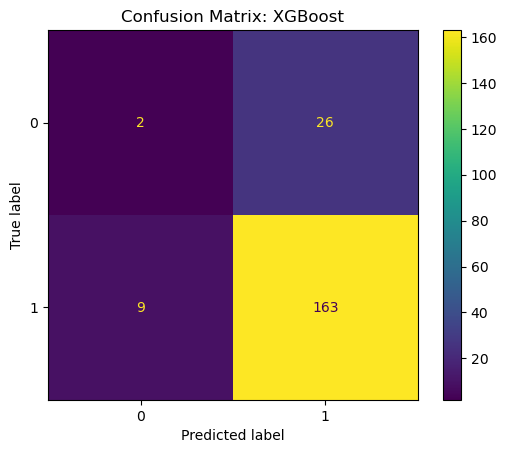

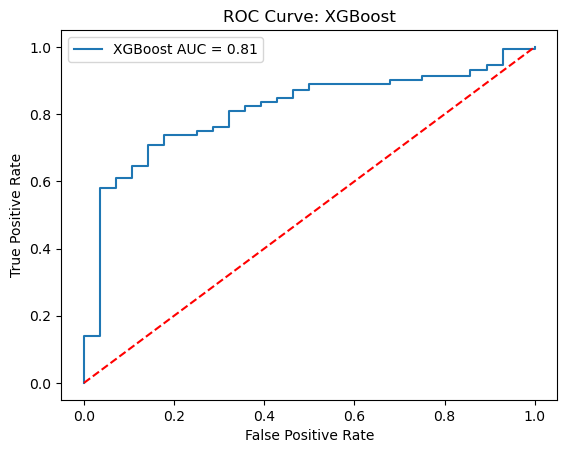

In [751]:
xgb = XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)
model_performance("XGBoost", xgb, x_test, y_test, results, best_models)

In [752]:
# Save best model
best_model_name = max(results, key=results.get)
best_model = best_models[best_model_name]
print(f"Saving the best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")
joblib.dump(best_model, "model.pkl")

Saving the best model: Logistic Regression with accuracy 0.8600


['model.pkl']

### Models Comparision

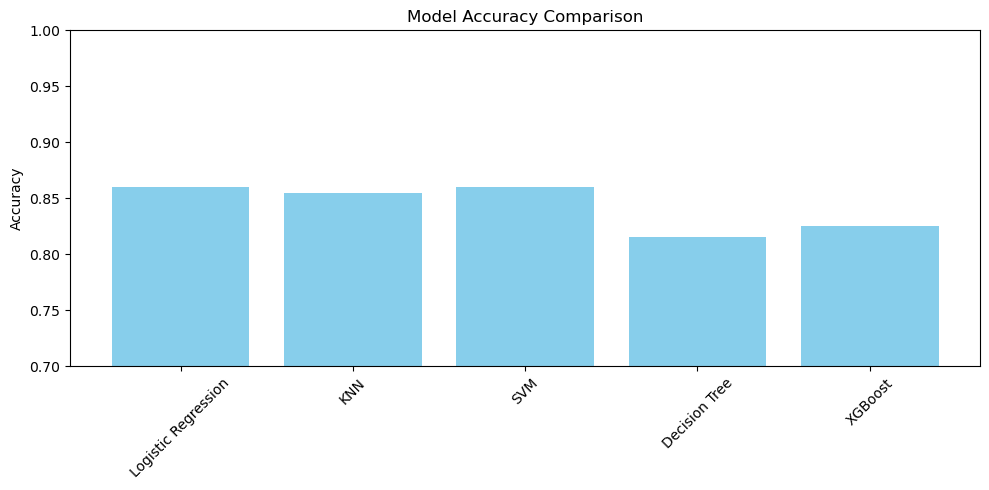

In [753]:
# Plot Model Comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

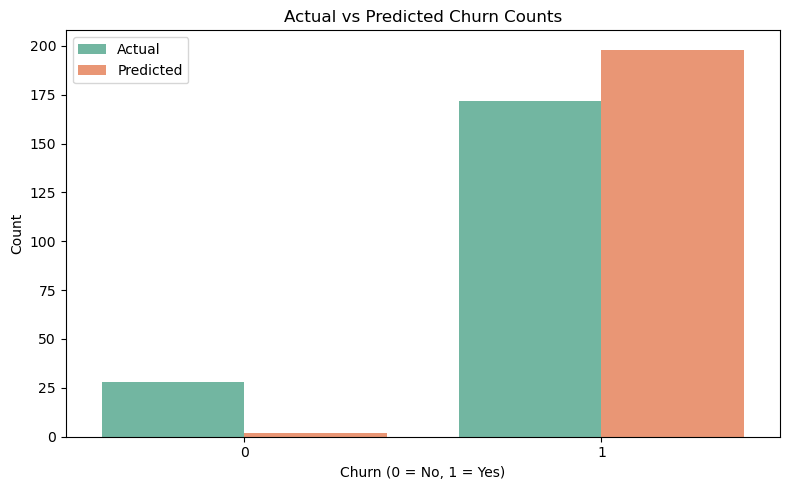

In [754]:
# Make predictions with the best model
y_pred = best_model.predict(x_test)

# Flatten y_test to match dimensions
y_test_flat = y_test.values.ravel()

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    "Actual": y_test_flat,
    "Predicted": y_pred
})

# Plot side-by-side counts
plt.figure(figsize=(8, 5))
sns.countplot(data=pd.melt(comparison_df), x="value", hue="variable", palette="Set2")
plt.title("Actual vs Predicted Churn Counts")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="")
plt.tight_layout()
plt.show()

In [755]:
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{0: 2, 1: 198}


In [756]:
print("Actual distribution in test set:\n", y_test.value_counts())
print("Predicted distribution:\n", pd.Series(y_pred).value_counts())

Actual distribution in test set:
 Churn
1        172
0         28
Name: count, dtype: int64
Predicted distribution:
 1    198
0      2
Name: count, dtype: int64


In [757]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5000    0.0357    0.0667        28
           1     0.8636    0.9942    0.9243       172

    accuracy                         0.8600       200
   macro avg     0.6818    0.5150    0.4955       200
weighted avg     0.8127    0.8600    0.8043       200

